In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import os.path 
from os import listdir
import os, sys

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize

In [3]:
import numpy as np
import math as m
import csv
import os.path 
from os import listdir
import os, sys

In [10]:
# To use Plotly for interactive tools uncomment of the rest of this cell
# import plotly
# plotly.offline.init_notebook_mode()


#init_notebook_mode(connected=True)  #USE THIS IF PROBLEMS OCCUR AND PLOTLY WANTS TO FUCK YOU UP FOR AN HOUR


# import plotly.plotly as py
# import plotly.tools as tls

In [5]:
f = open("/Users/kellygarcia/Google Drive/Test/Text Files/1.6kW 3.2mT/Port3 1.6kW 25sccm 3.2mT Forward 4 col.txt", "r")
reader = csv.reader(f, delimiter='\n')
result = np.array(list(reader))

wavelength = []
intensity = []
current = []
magnetic_field = []

for i in range(0, len(result)):
    p = result[i]
    dat = p[0].split()
    w = float(dat[0])
    i = float(dat[1])
    c = float(dat[2])
    m = float(dat[3])
    wavelength.append(w)
    intensity.append(i)   
    current.append(c)
    magnetic_field.append(m)
print(len(wavelength)/3648) #this number tells us over how large our B-field scan was 


f.close()

27.0


In [6]:
new_wavelength = [wavelength[i:i+3648] for i in range(0, len(wavelength), 3648)] 
new_intensity = [intensity[i:i+3648] for i in range(0, len(intensity), 3648)]
new_magnetic_field = [magnetic_field[i:i+3648] for i in range(0, len(intensity), 3648)]
#^^ we make a new array of arrays: [3648*(#Bfields=n) elements ]  -->  [[3648_1],[3648_2],....,[3648_n]] 
#in a new cell type out "len(new_wavelength)" and compare with "len(new_wavelength[1])"


# we now separate the data between ions (ion_b,etc.) and neutrals (n_b,etc.)
ion_b = []
ion_i = []
ion_w = []

for i in range(0,len(new_wavelength)):
    x = new_wavelength[i]
    y = new_intensity[i]
    z = new_magnetic_field[i]
    ion_b.append(z[0:1237]) #this indexes the first 1237 data points -- these are ions (blue) 
    ion_i.append(y[0:1237]) #in a new cell type & run "new_wavelength[1]"
    ion_w.append(x[0:1237]) #after that type and run "new_wavelength[1][1236]" this is the last wavelength I count as an "ion"
    
n_b = []
n_i = []
n_w = []

for i in range(0,len(new_wavelength)):
    x = new_wavelength[i]
    y = new_intensity[i]
    z = new_magnetic_field[i]
    n_b.append(z[1237::]) #this indexes the rest of the data points STARTING AT 1237  -- these are neutrals (pink/purple),
    n_i.append(y[1237::]) #this show us how python "counts" -- python: 0,1,2,3,... us: 1,2,3 
    n_w.append(x[1237::]) #this means that the first place holder in a list has an index of 0, the second is 1, etc.

In [7]:
len(ion_b[i]) + len(n_b[i]) #let's check if they add up to 3648

3648

In [8]:
intent_n = []
intent_i = []
b_n = [] 

for i in range(0,len(n_b)):
    s = n_b[i][1]
    b_n.append(s)

for i in range(0,len(n_i)):
    r = n_i[i][254:1322]
    intent_n.append(r)
    
for i in range(0,len(ion_i)):
    r = ion_i[i][354:839]
    intent_i.append(r)

In [18]:
len(b_n), len(intent_n), len(intent_i)  #let's check and make sure all are the same length

(27, 27, 27)

In [15]:
# Uncomment the rest of this cell to use interactive services with Plotly. Otherwise continue to next cell

# import plotly.plotly as py
# import plotly.graph_objs as go

# data=[go.Contour(
#         z=intent_n,x=n_w[1][254:1322],y=b_n,colorscale='Jet',
#         contours=dict(
#             coloring='lines'
#         )
#     )
# ]
# py.iplot(data)

<IPython.core.display.Javascript object>


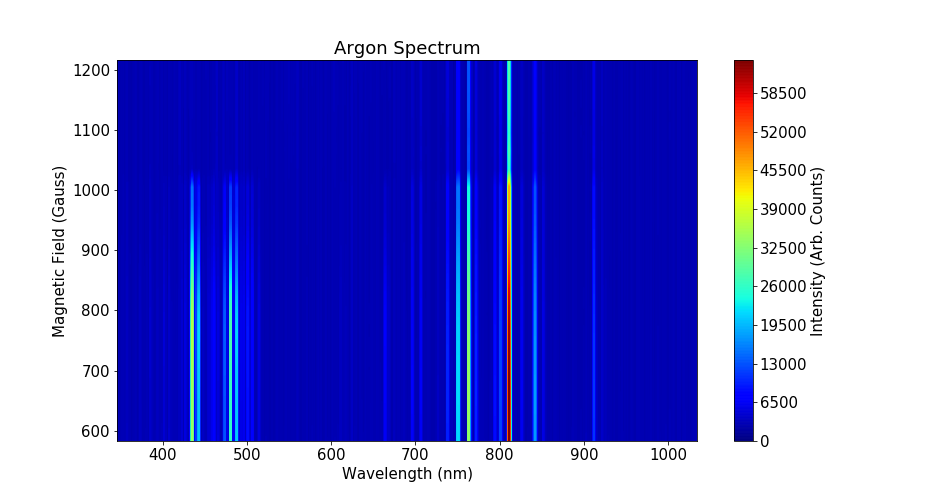

Text(0.5, 1.0, 'Argon Spectrum')

In [14]:
#matplotlib.rcParams.update({'font.size': 15})
figsize(13,7)
#plt.contour(ion_w[1][354:839],b_n,intent_i,cmap="jet") #354-839 ions, 254-1322 neutrals
#plt.contour(n_w[1][254:1322],b_n,intent_n,cmap="jet")
levels=np.linspace(0,64000,641)
plt.contour(new_wavelength[1],b_n[0:22],new_intensity[0:22],cmap="jet",levels=levels)
cbar=plt.colorbar()
cbar.ax.set_ylabel('Intensity (Arb. Counts)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnetic Field (Gauss)')
t='Argon Spectrum'
plt.title(t)
#plt.savefig('/Users/kellygarcia/Desktop' + str(t) + f.name[60:92] +'.png')